<h2>Using Filter Methods</h2>

In [3]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

data = pd.read_csv("data/winequality-white.csv",sep=";")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
454,6.4,0.28,0.29,1.6,0.052,34.0,127.0,0.9929,3.48,0.56,10.5,7.0
455,6.4,0.41,0.24,14.0,0.048,24.0,113.0,0.9982,3.44,0.53,9.8,6.0
456,6.3,0.23,0.31,1.5,0.022,11.0,82.0,0.9892,3.30,0.40,12.9,7.0
457,7.1,0.21,0.27,8.6,0.056,26.0,111.0,0.9956,2.95,0.52,9.5,5.0


In [5]:
x = data.iloc[:,:-1] 
y = data.iloc[:,-1] 

In [6]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
454,6.4,0.28,0.29,1.6,0.052,34.0,127.0,0.9929,3.48,0.56,10.5
455,6.4,0.41,0.24,14.0,0.048,24.0,113.0,0.9982,3.44,0.53,9.8
456,6.3,0.23,0.31,1.5,0.022,11.0,82.0,0.9892,3.30,0.40,12.9
457,7.1,0.21,0.27,8.6,0.056,26.0,111.0,0.9956,2.95,0.52,9.5


In [7]:
y

0      6.0
1      6.0
2      6.0
3      6.0
4      6.0
      ... 
454    7.0
455    6.0
456    7.0
457    5.0
458    NaN
Name: quality, Length: 459, dtype: float64

In [8]:
X_norm = x/x.mean()

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

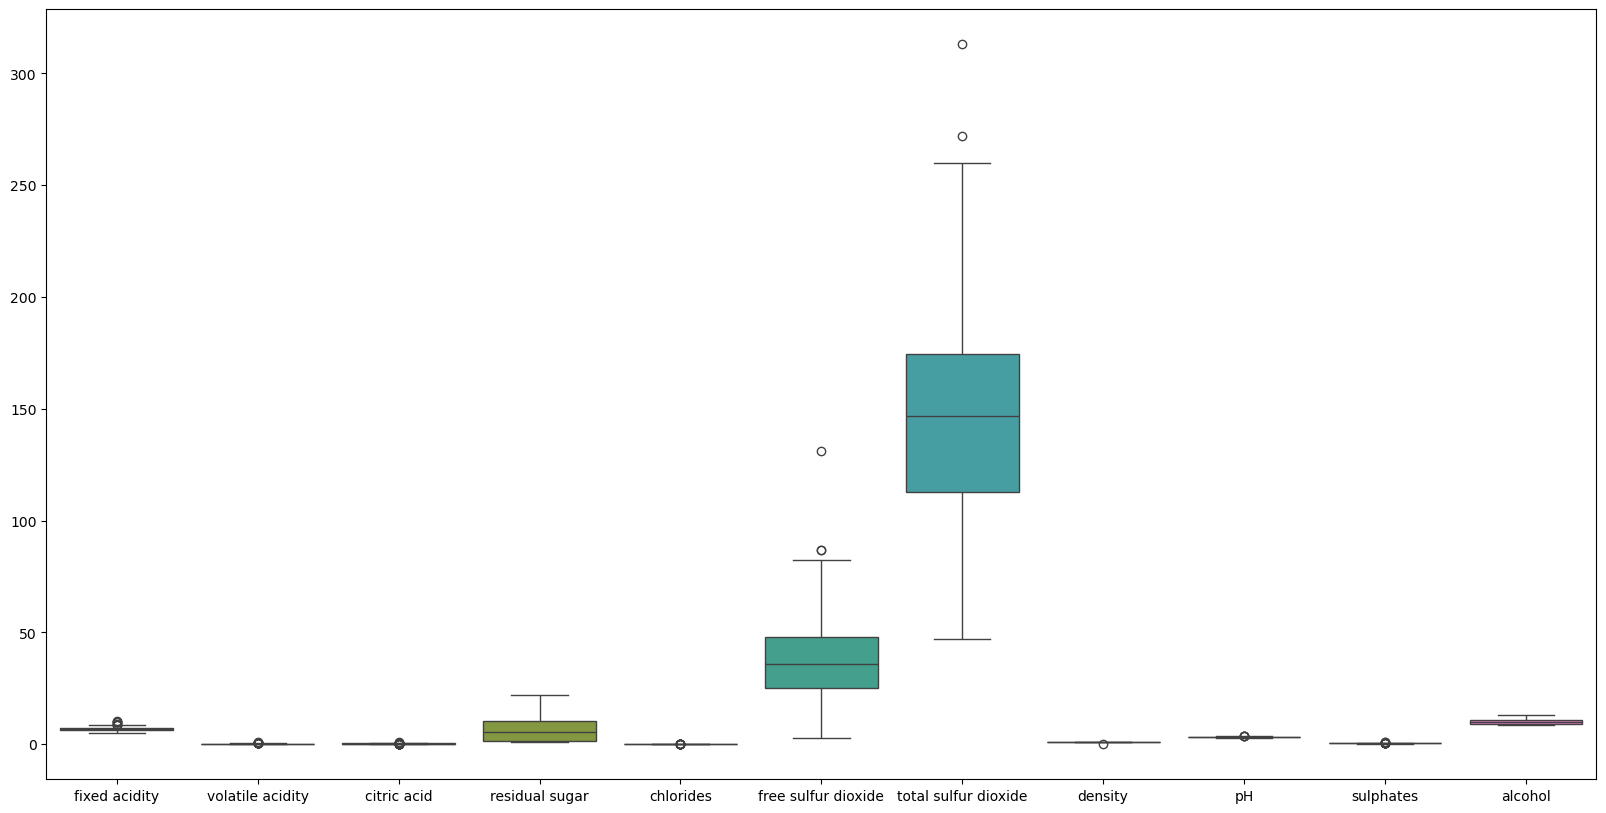

In [10]:
plt.figure(figsize=(20,10))
sns.boxplot(x)
plt.show()

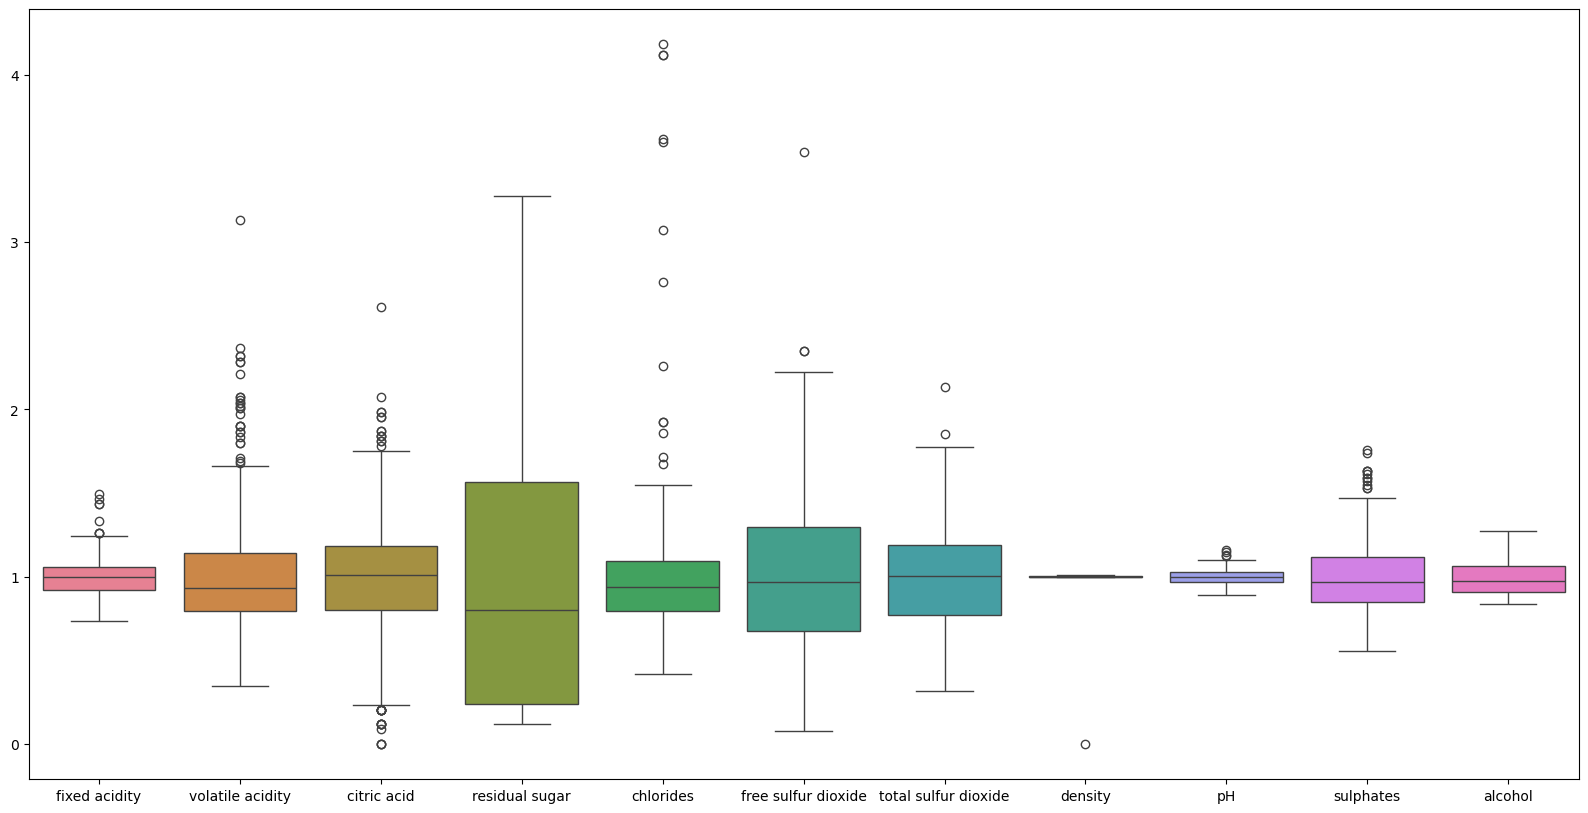

In [11]:
plt.figure(figsize=(20,10))
sns.boxplot(X_norm)
plt.show()

In [12]:
variances = X_norm.var()
feature_variance = pd.DataFrame({
    'Feature': X_norm.columns,
    'Variance': variances
})
for index, row in feature_variance.iterrows():
    print(f"{row['Feature']}: {row['Variance']:.3f}")
    


fixed acidity: 0.012
volatile acidity: 0.136
citric acid: 0.126
residual sugar: 0.639
chlorides: 0.167
free sulfur dioxide: 0.202
total sulfur dioxide: 0.093
density: 0.002
pH: 0.002
sulphates: 0.044
alcohol: 0.011


In [13]:
selector = VarianceThreshold(threshold=0.2)
X_selected = selector.fit_transform(X_norm) #Normalize important
print(X_selected)


[[3.08353617 1.21471418]
 [0.23834096 0.37791108]
 [1.02784539 0.80980946]
 [1.26618635 1.26870148]
 [1.26618635 1.26870148]
 [1.02784539 0.80980946]
 [1.0427417  0.80980946]
 [3.08353617 1.21471418]
 [0.23834096 0.37791108]
 [0.22344465 0.75582216]
 [0.21599649 0.29693013]
 [0.62564502 0.45889203]
 [0.17875572 0.43189838]
 [0.22344465 1.29569513]
 [2.86753967 1.10673959]
 [0.22344465 0.75582216]
 [0.16385941 0.80980946]
 [0.17875572 0.78281581]
 [0.16385941 0.45889203]
 [1.11722325 0.91778405]
 [0.17875572 0.78281581]
 [0.43199299 0.51287932]
 [0.25323727 1.10673959]
 [0.22344465 0.67484121]
 [0.19365203 0.43189838]
 [1.3406679  1.51164432]
 [0.1489631  0.9447777 ]
 [1.29597897 0.86379675]
 [0.16385941 0.45889203]
 [0.2979262  0.998765  ]
 [1.54921624 0.53987297]
 [0.16385941 0.18895554]
 [0.30537435 0.83680311]
 [0.22344465 1.16072689]
 [2.22699834 0.59386027]
 [0.25323727 0.56686662]
 [0.80440074 0.67484121]
 [0.17875572 1.02575865]
 [2.67388764 1.21471418]
 [2.67388764 1.21471418]


In [14]:
mask = selector.get_support()
mask

array([False, False, False,  True, False,  True, False, False, False,
       False, False])

In [16]:
selected_features = x.columns[mask]
print(selected_features)

Index(['residual sugar', 'free sulfur dioxide'], dtype='object')


In [17]:
for index, row in feature_variance.iterrows():
    if row['Feature'] in selected_features:
     print(f"{row['Feature']}: {row['Variance']:.3f}")

residual sugar: 0.639
free sulfur dioxide: 0.202


<h2>Using Correlation</h2>

In [18]:
import seaborn as sns

<Axes: >

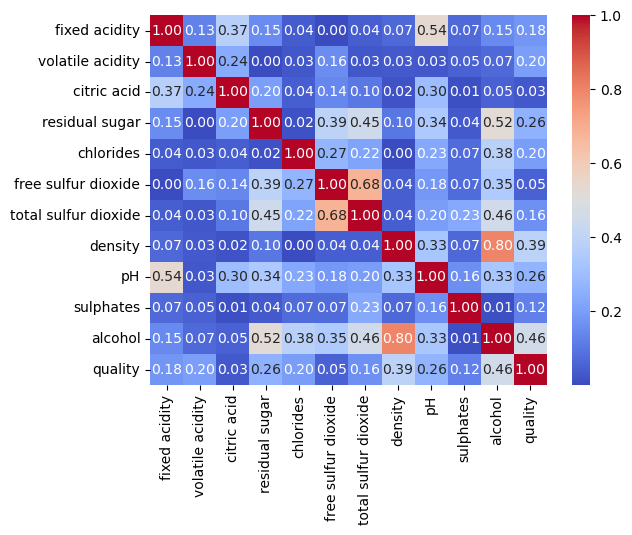

In [19]:
data = pd.read_csv("data/winequality-white.csv",sep=";")
correlation_matrix = data.corr().abs()
sns.heatmap(correlation_matrix,cmap="coolwarm",annot=True,fmt=".2f")

In [20]:
threshold = 0.1
target_correlation = correlation_matrix.iloc[:-1, -1]
selected_features = target_correlation[target_correlation >= threshold].index
print(target_correlation)

fixed acidity           0.179318
volatile acidity        0.200333
citric acid             0.032162
residual sugar          0.258890
chlorides               0.199274
free sulfur dioxide     0.050165
total sulfur dioxide    0.161224
density                 0.389927
pH                      0.263974
sulphates               0.123002
alcohol                 0.456699
Name: quality, dtype: float64


In [21]:
print(selected_features.values)

['fixed acidity' 'volatile acidity' 'residual sugar' 'chlorides'
 'total sulfur dioxide' 'density' 'pH' 'sulphates' 'alcohol']


In [22]:
target_correlation["fixed acidity"]

0.17931795245967241

In [23]:
selected_features_with_corr = [feature+": "+str(target_correlation[feature]) for feature in selected_features.values ]

In [24]:
selected_features_with_corr

['fixed acidity: 0.17931795245967241',
 'volatile acidity: 0.20033326126654483',
 'residual sugar: 0.25888960007785067',
 'chlorides: 0.1992739530976407',
 'total sulfur dioxide: 0.16122367700040316',
 'density: 0.389926528856471',
 'pH: 0.2639744325031615',
 'sulphates: 0.1230018902426312',
 'alcohol: 0.4566989837775105']

<h2>Using Wrapper Methods</h2>

In [34]:
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pandas as pd


data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target


In [36]:
X.dropna(inplace=True)

In [35]:
model = LogisticRegression(max_iter=10000)
lr= model.fit(X,y)

In [37]:
lr.coef_

array([[-1.60615245e-02, -4.37933994e-02, -1.02598421e-02, ...,
        -3.86568851e-02, -2.09067473e-02, -3.35268823e-02],
       [ 1.84530869e-03, -4.37567028e-02, -8.05631850e-03, ...,
        -3.85879964e-02, -6.33697828e-02, -5.37966200e-02],
       [-2.65947791e-02, -4.36566273e-02, -6.19017970e-02, ...,
        -7.45505373e-02, -5.47459722e-02, -6.58257058e-02],
       ...,
       [ 3.36387778e-02,  4.96277701e-02,  1.09060630e-01, ...,
        -2.84154060e-03,  2.72247513e-02,  7.19096420e-02],
       [ 3.36531201e-02,  4.95388278e-02,  1.22768273e-01, ...,
         1.05827088e-01, -1.43443589e-04,  2.70887459e-02],
       [-4.82961163e-02, -4.39177302e-02,  1.57877122e-01, ...,
         3.35025991e-02,  2.73286594e-02,  1.09899551e-02]])

In [38]:
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

{'age': 0.02, 'sex': 0.04, 'bmi': 0.01, 'bp': 0.0, 's1': 0.04, 's2': 0.03, 's3': 0.01, 's4': 0.04, 's5': 0.02, 's6': 0.03}


In [39]:
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X, y)

In [40]:
ranking = fit.ranking_
feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': ranking
})

print(feature_ranking.sort_values(ascending=True,by='Ranking'))


  Feature  Ranking
2     bmi        1
3      bp        1
6      s3        1
7      s4        1
8      s5        1
0     age        2
9      s6        3
1     sex        4
4      s1        5
5      s2        6


<h2>Using Embedded Methods</h1>

In [41]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LassoCV


data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Lasso Regression
lasso = LassoCV()
lasso.fit(X, y)
importance = lasso.coef_

In [42]:
importance

array([  -6.49469328, -235.99308032,  521.7443693 ,  321.0607768 ,
       -569.43813385,  302.45319289,   -0.        ,  143.69851474,
        669.92267515,   66.83551067])

In [43]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

In [44]:
feature_importance

,Feature,Importance
0,age,-6.494693
1,sex,-235.993080
2,bmi,521.744369
3,bp,321.060777
4,s1,-569.438134
5,s2,302.453193
6,s3,-0.000000
7,s4,143.698515
8,s5,669.922675
9,s6,66.835511


In [45]:
selected_features = X.columns[(importance != 0)]

print("Selected Features:\n", selected_features.values)


Selected Features:
 ['age' 'sex' 'bmi' 'bp' 's1' 's2' 's4' 's5' 's6']
